In [7]:
import math
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%matplotlib inline

-0.799882080907
0.797367803359


/Users/franciscojavierarceo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:31: RuntimeWarning: covariance is not positive-semidefinite.


,R,Orig,SVD,Ratio
0,10,1.001723,4.622032,4.61408


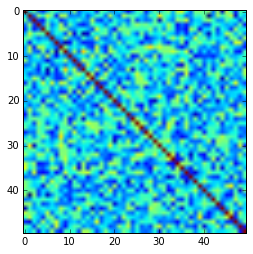

In [138]:
simSVD(corrMatrix=True)

In [137]:
def svdout(xin, r):
    if r > xin.shape[1]:
        return 'r > k; r needs to be < k'
    
    U, s, V = np.linalg.svd(xin, full_matrices=False)
    D = np.diag(s)
    xpred = np.dot(U[:, 0:r], np.dot(D[0:r, 0:r], V[0:r,:]))
    return xpred

def predlm(xin, ys):
    mod = linear_model.LinearRegression().fit(xin, ys)
    pred = mod.predict(xin)
    rmse = np.sqrt( np.mean( (ys - pred)**2 )) 
    return rmse

def simSVD(n=1e4, k=50, eVar=1, l=10, seedval=0, corrMatrix=False):
    # next step add non-diagonal covariance
    np.random.seed(seedval)
    covmat = np.diag([eVar]*k)

    if corrMatrix==True:
        tmpcov = np.ones((k,k))
        for i in range(k):
            for j in range(k):
                tmpcov[i,j] = np.random.uniform(low=-0.8,high=0.8, size=1)
                #tmpcov[i,j] = np.random.standard_normal(size=1)
                tmpcov[j,i] = tmpcov[i,j]
        covmat=tmpcov
        print np.min(tmpcov); print np.max(tmpcov)

    xs = np.random.multivariate_normal(mean=np.zeros(k), cov=covmat, size=[int(n)])
    xs = (xs - np.mean(xs,axis=0)) / np.std(xs,axis=0)
    plt.imshow(np.cov(xs, rowvar=False))
    noise = np.random.normal(size=int(n), loc=0, scale=eVar)
    
    xsprd = svdout(xs, r=l)
    eps = xs - xsprd
    bs = np.ones(k)
    y = eps.dot(bs) + noise
    
    orig_perf = predlm(xs, y)
    svd_perf = predlm(xsprd, y)
    
    return pd.DataFrame([l, orig_perf, svd_perf, svd_perf/orig_perf], index=['R','Orig','SVD', 'Ratio']).T

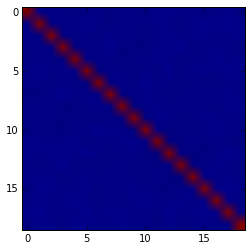

In [8]:
# With a varying error term
ncols, rankr, orig, svds, rati, error = [], [], [], [], [], []
for e in tqdm(range(10,31)):
    for j in range(10, 20):
        for i in range(j):
            tmp = simSVD(n=1e5, k = j, eVar=(e/10.0), l=i, seedval=1).values.tolist()[0]
            ncols.append(j)
            rankr.append(i)
            error.append(e/10.0)
            orig.append(tmp[1])
            svds.append(tmp[2])
            rati.append(tmp[3])

In [44]:
out

,NCols,R,Orig,SVD,Ratio,Error
0,10,0,0.993138,3.314889,3.337794,1
1,10,1,0.993138,3.094186,3.115567,1
2,10,2,0.993138,2.866535,2.886342,1
3,10,3,0.993138,2.832339,2.851910,1
4,10,4,0.993138,2.740403,2.759338,1
5,10,5,0.993138,2.174438,2.189463,1
6,10,6,0.993138,1.692487,1.704182,1
7,10,7,0.993138,1.688897,1.700567,1
8,10,8,0.993138,1.458905,1.468985,1
9,10,9,0.993138,0.993534,1.000399,1


In [45]:
out = pd.DataFrame([ncols,rankr,orig,svds,rati,error], index=['NCols','R','Orig','SVD','Ratio', "Error"]).T
bnds = [int(np.min(out['Ratio'])), int(math.ceil(np.max(out['Ratio'])))]

In [132]:
es = list(set(out.Error))
es.sort(reverse=True)
for idx, i in enumerate(es):
    X, Y, Z = out.ix[out['Error']==i,'R'], out.ix[out['Error']==i,'NCols'], out.ix[out['Error']==i,'Ratio']
    fig = plt.figure(figsize=(12,12))
    ax = fig.gca(projection='3d')
    ax.plot_trisurf(X, Y, Z, cmap=cm.bwr)
    ax.set_zlim(bnds[0], bnds[1])
    ax.set_title('3d Plot of SVD with Model Error ='+str(i)+'\n' +'Iteration '+str(idx) +'\n \n')
    ax.set_ylabel('Low Rank Approximation Size')
    ax.set_xlabel('True Rank')
    ax.set_zlabel('Ratio of True Rank Model and Low Rank Error')
    plt.close()
    fig.savefig('3dplot'+str(idx).zfill(2)+'.png')

In [ ]:
es = list(set(out.Error))
es.sort(reverse=True)
for idx, i in enumerate(es):
    X, Y, Z = out.ix[out['Error']==i,'R'], out.ix[out['Error']==i,'NCols'], out.ix[out['Error']==i,'Ratio']
    fig = plt.figure(figsize=(12,12))
    ax = fig.gca(projection='3d')
    ax.plot_trisurf(X, Y, Z, cmap=cm.bwr)
    ax.set_zlim(bnds[0], bnds[1])
    ax.set_title('3d Plot of SVD with Model Error ='+str(i)+'\n' +'Iteration '+str(idx) +'\n \n')
    ax.set_ylabel('Low Rank Approximation Size')
    ax.set_xlabel('True Rank')
    ax.set_zlabel('Ratio of True Rank Model and Low Rank Error')
    plt.close()
    fig.savefig('3dplot'+str(idx).zfill(2)+'.png')

In [ ]:
import os
from images2gif import writeGif
from PIL import Image

file_names = [f for f in os.listdir('./') if f.endswith('.png')]
file_names.sort()
images = [Image.open(fn) for fn in file_names]
writeGif("3dplot_gif.GIF", images, duration=0.75)

In [173]:
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.colors as mcolors

In [178]:
def make_colormap(seq):
    """Return a LinearSegmentedColormap
    seq: a sequence of floats and RGB-tuples. The floats should be increasing
    and in the interval (0,1).
    """
    seq = [(None,) * 3, 0.0] + list(seq) + [1.0, (None,) * 3]
    cdict = {'red': [], 'green': [], 'blue': []}
    for i, item in enumerate(seq):
        if isinstance(item, float):
            r1, g1, b1 = seq[i - 1]
            r2, g2, b2 = seq[i + 1]
            cdict['red'].append([item, r1, r2])
            cdict['green'].append([item, g1, g2])
            cdict['blue'].append([item, b1, b2])
    return mcolors.LinearSegmentedColormap('CustomMap', cdict)

c = mcolors.ColorConverter().to_rgb
rvb = make_colormap( [c('red'), c('white'), 0.34, c('white'), c('blue'), 0.66, c('blue')] )

In [191]:
import matplotlib as mpl

X, Y, Z = out.ix[out['Error']==i,'R'], out.ix[out['Error']==i,'NCols'], out.ix[out['Error']==i,'Ratio']
fig = plt.figure(figsize=(12,12))
weedmap = mpl.colorbar.ColorbarBase(ax, cmap=rvb)
weedmap.set_clim(out.Error.min(), out.Error.max())
ax = fig.gca(projection='3d')
ax.plot_trisurf(X, Y, Z, cmap=weedmap)
ax.set_zlim(bnds[0], bnds[1])
ax.set_title('3d Plot of SVD with Model Error ='+str(i)+'\n' +'Iteration '+str(idx) +'\n \n')
ax.set_ylabel('Low Rank Approximation Size')
ax.set_xlabel('True Rank')
ax.set_zlabel('Ratio of True Rank Model and Low Rank Error')

AssertionError: 

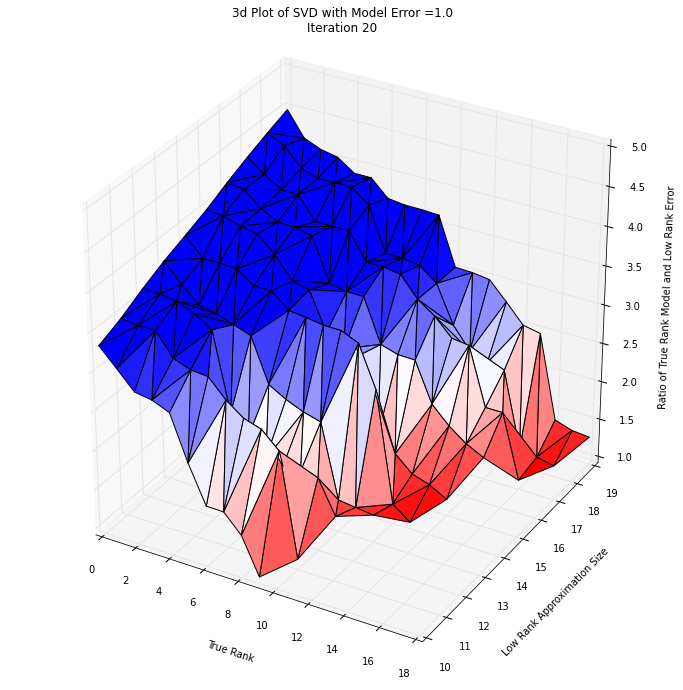

In [181]:
X, Y, Z = out.ix[out['Error']==i,'R'], out.ix[out['Error']==i,'NCols'], out.ix[out['Error']==i,'Ratio']
fig = plt.figure(figsize=(12,12))
ax = fig.gca(projection='3d')
ax.plot_trisurf(X, Y, Z, cmap=make_colormap( [c('red'), c('white'), 0.34, c('white'), c('blue'), 0.67, c('blue')] ))
ax.set_zlim(bnds[0], bnds[1])
ax.set_title('3d Plot of SVD with Model Error ='+str(i)+'\n' +'Iteration '+str(idx) +'\n \n')
ax.set_ylabel('Low Rank Approximation Size')
ax.set_xlabel('True Rank')
ax.set_zlabel('Ratio of True Rank Model and Low Rank Error')

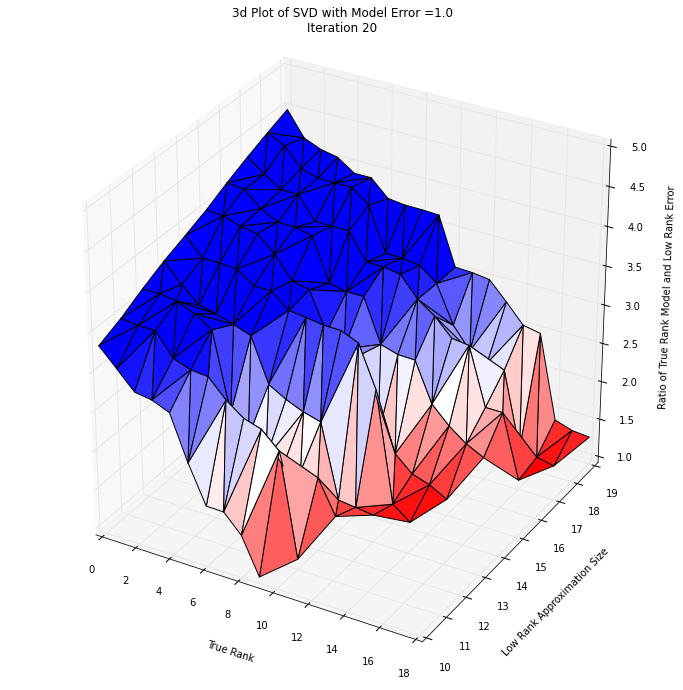

In [179]:
cdict1 = {'red':   ((0.0, 0.0, 0.0),(0.5, 0.0, 0.1), (1.0, 1.0, 1.0)),
     'green': ((0.0, 0.0, 0.0), (0.0+i/10.0, 0.0, 0.0)),
     'blue':  ((0.0, 0.0, 1.0), (0.5, 0.1, 0.0), (1.0, 0.0, 0.0)) }
colgrad = LinearSegmentedColormap('BlueRed1', cdict1)
X, Y, Z = out.ix[out['Error']==i,'R'], out.ix[out['Error']==i,'NCols'], out.ix[out['Error']==i,'Ratio']
fig = plt.figure(figsize=(12,12))
ax = fig.gca(projection='3d')
ax.plot_trisurf(X, Y, Z, cmap=rvb)
ax.set_zlim(bnds[0], bnds[1])
ax.set_title('3d Plot of SVD with Model Error ='+str(i)+'\n' +'Iteration '+str(idx) +'\n \n')
ax.set_ylabel('Low Rank Approximation Size')
ax.set_xlabel('True Rank')
ax.set_zlabel('Ratio of True Rank Model and Low Rank Error')

In [170]:
es = list(set(out.Error))
es.sort(reverse=True)
for idx, i in enumerate(es):
    cdict1 = {'red':   ((0.0, 0.0, 0.0),(0.5, 0.0, 0.1), (1.0, 1.0, 1.0))}
    colgrad = LinearSegmentedColormap('BlueRed1', cdict1)
    X, Y, Z = out.ix[out['Error']==i,'R'], out.ix[out['Error']==i,'NCols'], out.ix[out['Error']==i,'Ratio']
    fig = plt.figure(figsize=(12,12))
    ax = fig.gca(projection='3d')
    ax.plot_trisurf(X, Y, Z, cmap=colgrad)
    ax.set_zlim(bnds[0], bnds[1])
    ax.set_title('3d Plot of SVD with Model Error ='+str(i)+'\n' +'Iteration '+str(idx) +'\n \n')
    ax.set_ylabel('Low Rank Approximation Size')
    ax.set_xlabel('True Rank')
    ax.set_zlabel('Ratio of True Rank Model and Low Rank Error')
#    plt.close()
#    fig.savefig('3dplot'+str(idx).zfill(2)+'.png')

KeyError: u'green'

KeyError: u'green'

KeyError: u'green'

KeyError: u'green'

KeyError: u'green'

KeyError: u'green'

KeyError: u'green'

KeyError: u'green'

KeyError: u'green'

KeyError: u'green'

KeyError: u'green'

KeyError: u'green'

KeyError: u'green'

KeyError: u'green'

KeyError: u'green'

KeyError: u'green'

KeyError: u'green'

KeyError: u'green'

KeyError: u'green'

KeyError: u'green'

KeyError: u'green'

In [133]:
!python make3dgif.py

/Users/franciscojavierarceo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:30: RuntimeWarning: covariance is not positive-semidefinite.


ValueError: x and y arrays must have a length of at least 3

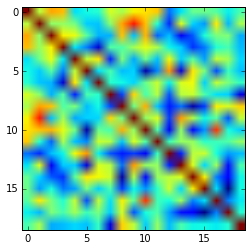

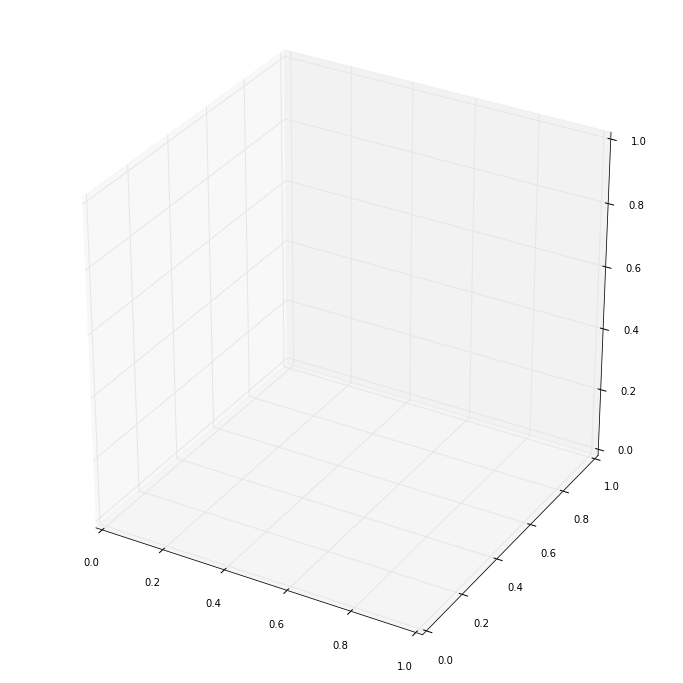

In [402]:
# With a varying error term and correlated design matrix
ncols, rankr, orig, svds, rati, error = [], [], [], [], [], []
for e in tqdm(range(10,31)):
    for j in range(10, 20):
        for i in range(j):
            tmp = simSVD(n=1e5, k = j, eVar=(e/10.0), l=i, seedval=1, corrMatrix=True).values.tolist()[0]
            ncols.append(j)
            rankr.append(i)
            error.append(e/10.0)
            orig.append(tmp[1])
            svds.append(tmp[2])
            rati.append(tmp[3])

In [ ]:
out = pd.DataFrame([ncols,rankr,orig,svds,rati,error], index=['NCols','R','Orig','SVD','Ratio', "Error"]).T
bnds = [int(np.min(out['Ratio'])), int(math.ceil(np.max(out['Ratio'])))]
for i in range(1,10):
    X, Y, Z = out.ix[out['Error']==i,'R'], out.ix[out['Error']==i,'NCols'], out.ix[out['Error']==i,'Ratio']
    fig = plt.figure(figsize=(12,12))
    ax = fig.gca(projection='3d')
    ax.plot_trisurf(X, Y, Z, cmap=cm.jet)
    #ax.set_zlim(bnds[0],bnds[1])
    ax.set_title('3d Plot of SVD and Model Error \n \n')
    ax.set_ylabel('Low Rank Approximation Size')
    ax.set_xlabel('True Rank')
    ax.set_zlabel('Ratio of True Rank Model and Low Rank Error')
    plt.close()
    fig.savefig('3dplotcorr'+str(i)+'.png')

In [12]:
def stupid():
    return 1,

In [18]:
line

In [9]:
# Need to get this to work for 3d plot
from tempfile import NamedTemporaryFile

VIDEO_TAG = """<video controls>
 <source src="data:video/x-m4v;base64,{0}" type="video/mp4">
 Your browser does not support the video tag.
</video>"""

def anim_to_html(anim):
    if not hasattr(anim, '_encoded_video'):
        with NamedTemporaryFile(suffix='.mp4') as f:
            anim.save(f.name, fps=20, extra_args=['-vcodec', 'libx264'])
            video = open(f.name, "rb").read()
        anim._encoded_video = video.encode("base64")
    
    return VIDEO_TAG.format(anim._encoded_video)

from IPython.display import HTML

def display_animation(anim):
    plt.close(anim._fig)
    return HTML(anim_to_html(anim))

from matplotlib import animation

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(0, 2), ylim=(-2, 2))
line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=25, interval=20, blit=True)

# call our new function to display the animation
display_animation(anim)

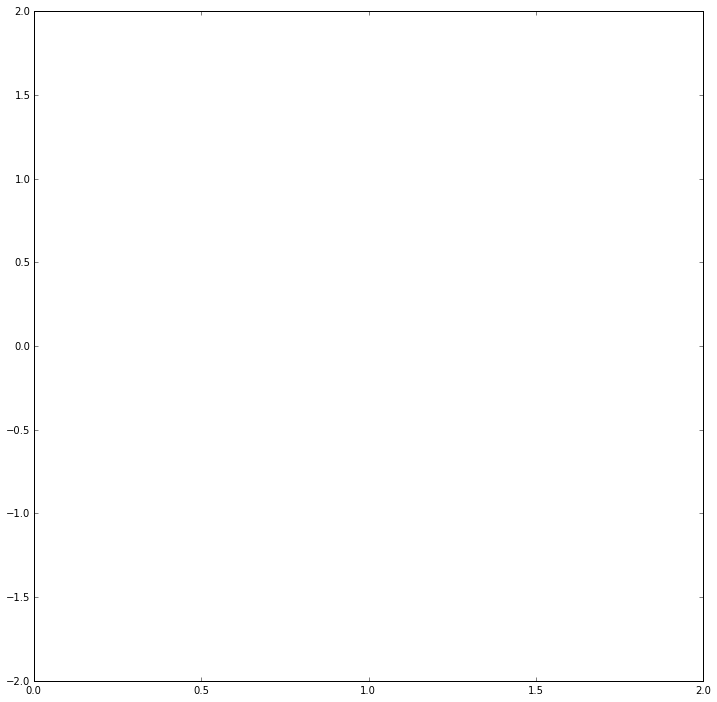

In [33]:
fig = plt.figure(figsize=(12,12))
ax = plt.axes(xlim=(0, 2), ylim=(-2, 2))
tst, = ax.plot([], [])
#ax = fig.gca(projection='3d')
#grph, = ax.plot_trisurf()

ValueError: x and y arrays must have a length of at least 3

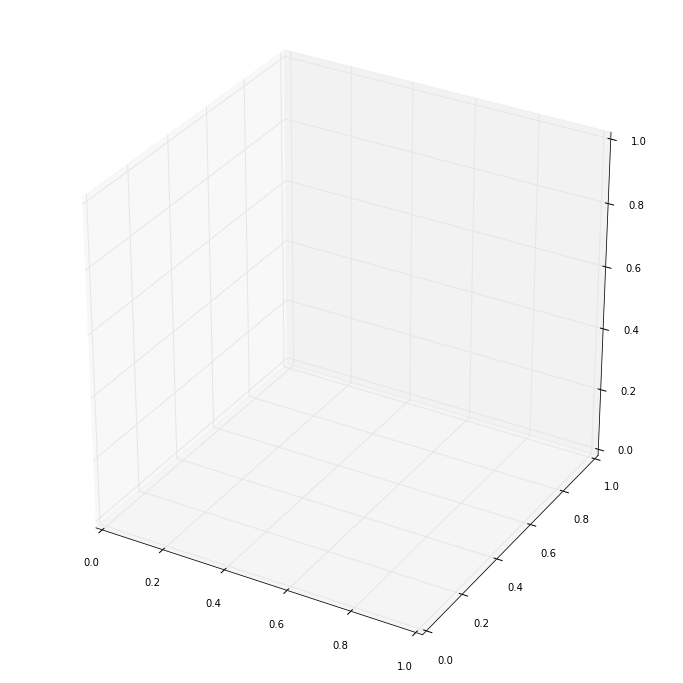

In [39]:
from matplotlib import animation
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
ax = fig.gca(projection='3d')
# ax.plot_trisurf(X, Y, Z, cmap=cm.jet)
# ax.set_title('3d Plot of SVD and Model Error \n \n')
# ax.set_ylabel('Low Rank Approximation Size')
# ax.set_xlabel('True Rank')
# ax.set_zlabel('Ratio of True Rank Model and Low Rank Error')
grph, = ax.plot_trisurf([], [], [])

def init():
    grph.set_data(X, Y, Z)
    return grph,

def animate(out, i):
    X, Y, Z = out.ix[out['Error']==i,'R'], out.ix[out['Error']==i,'NCols'], out.ix[out['Error']==i,'Ratio']
    grph.set_data(X, Y, Z)
    return grph,

#anim = animation.FuncAnimation(fig, animate, init_func=init,
#                               frames=5, interval=20, blit=True)

#display_animation(anim)

In [170]:
mpl.__version__

'1.4.2'

In [187]:
out

,NCols,R,Orig,SVD,Ratio,Error
0,10,0,0.993138,3.313350,3.336245,1
1,10,1,0.993138,2.943824,2.964166,1
2,10,2,0.993138,2.926516,2.946738,1
3,10,3,0.993138,2.658179,2.676547,1
4,10,4,0.993138,2.578392,2.596209,1
5,10,5,0.993138,2.341242,2.357420,1
6,10,6,0.993138,1.969416,1.983025,1
7,10,7,0.993138,1.809382,1.821885,1
8,10,8,0.993138,1.676755,1.688341,1
9,10,9,0.993138,1.013577,1.020580,1


In [188]:
print pd.DataFrame([out.R, out.NCols, out.Ratio, out.NormError]).T.head()

   R  NCols     Ratio  Error
0  0     10  3.336245      0
1  1     10  2.964166      0
2  2     10  2.946738      0
3  3     10  2.676547      0
4  4     10  2.596209      0


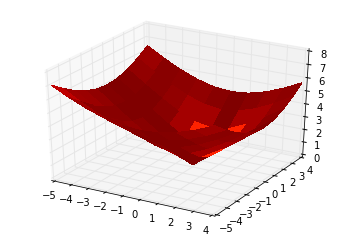

In [190]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.gca(projection='3d')
X = np.arange(-5, 5, 1)
Y = np.arange(-5, 5, 1)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = R #np.sin(R)
Gx, Gy = np.gradient(Z) # gradients with respect to x and y
G = (Gx**2+Gy**2)**.5  # gradient magnitude
N = G/G.max()  # normalize 0..1
surf = ax.plot_surface(
    X, Y, Z, rstride=1, cstride=1,
    facecolors=cm.jet(N),
    linewidth=0, antialiased=False, shade=False)
plt.show()

In [104]:
out.NormError = (out.Error - min(out.Error))/max(out.Error - min(out.Error))